In [1]:
import sys

# setting path
sys.path.append('/home/mike/Documents/github/modwaves/development')

In [2]:
# code in waterwaves.wave
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import root

from waterwaves.start import linear # these are relativized in package
from waterwaves.display import eta,Ej,extract,QR
from waterwaves.grids import grids
from waterwaves.boundary import F
from waterwaves.parameters import Hmx_d,Hmx_0,d_L
from waterwaves.wave import wave,wave_base

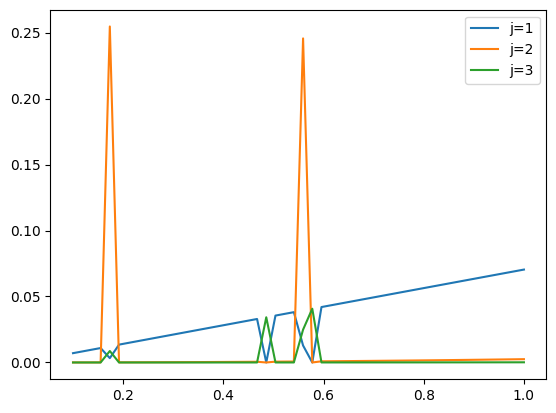

In [3]:
H=np.linspace(0.1,1)
SOL=wave_base(3,H,0)

Ej(H,SOL)
plt.legend()
plt.show()

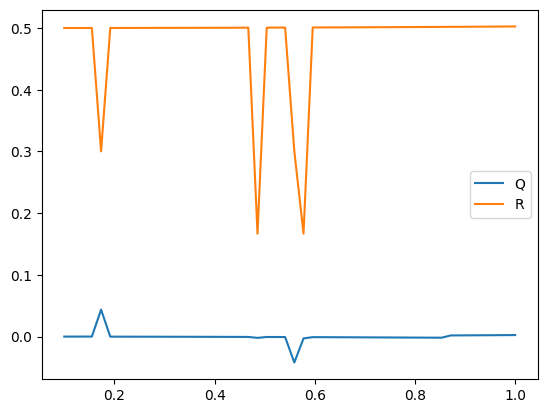

In [4]:
QR(H,SOL)
plt.legend()
plt.show()

In [5]:
Hp=np.linspace(0.6,0.8,3)
BASE=wave_base(3,Hp,0)

In [6]:
from scipy.interpolate import make_interp_spline as mis
extract(BASE,'success')
fs=mis(Hp,extract(BASE,'x'),k=min(len(Hp)-1,3))

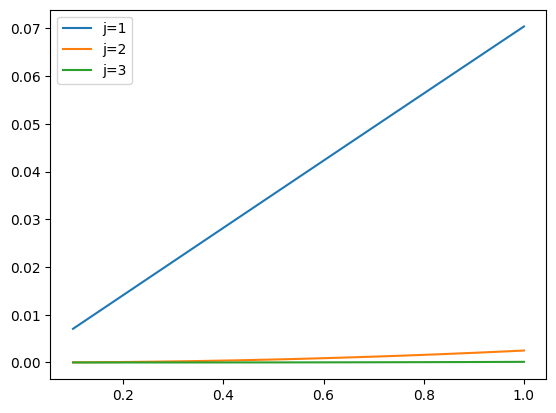

In [7]:
SOL=wave_base(3,H,0,fs) # spline start settles Fourier components versus h=H/Hmx
Ej(H,SOL)
plt.legend()
plt.show()

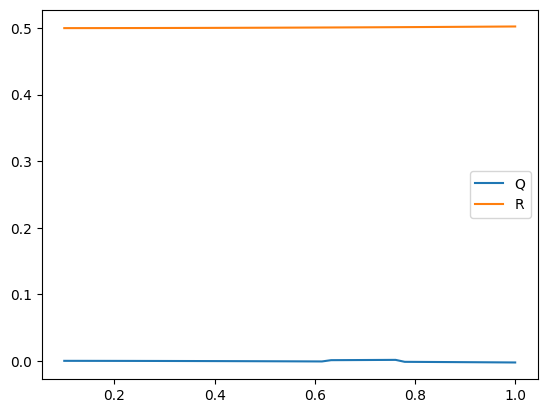

In [8]:
QR(H,SOL) # and Q,R
plt.legend()
plt.show()

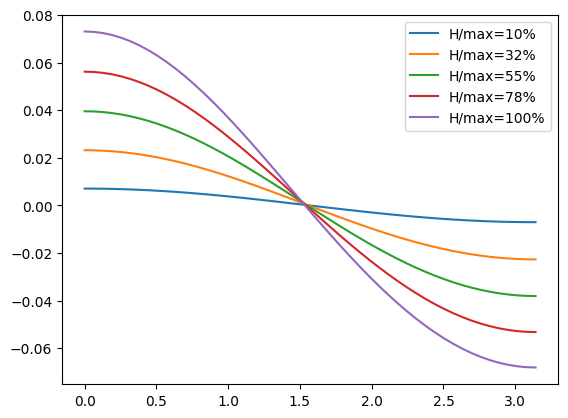

In [9]:
N=40
for h in np.linspace(0.1,1,5):
    A0=np.insert(fs(h),-2,np.zeros(N-3))
    sol=wave(N,h*Hmx_0,A0=A0)
    if not sol.success:
        print(h)
        print(sol.message)
        continue    
    X=np.linspace(0,np.pi)
    eta(X,0,sol,f'H/max={h:.0%}')
plt.legend()
plt.show()